**IMPORTACION DE PAQUETES **

In [10]:
import pandas as pd

Utilizamos el siguiente comando para importar la biblioteca de Python, pandas, para acceder a las herramientas de datos como DataFrames y Series de tiempo que se encuentra en el diferentes formatos, en nuestro caso un csv "Index 18-23".

In [11]:
import numpy as np

Este comando permite realizar operaciones lógicas en arreglos multidimensionales.

In [12]:
import matplotlib.pyplot as plt

Este comando permite crear gráficos y visualizaciones tanto estáticas como animadas.

In [13]:
import statsmodels.graphics.tsaplots as sgt

Este comando proporciona funciones para graficar características de las series temporales. Por ejemplo, la autocorrelación.

In [14]:
import statsmodels.tsa.stattools as sts

Este comando permite utilizar herramientas estáticas para series temporales -test de estacionariedad-.

In [15]:
from statsmodels.tsa.arima_model import ARMA

Es un módulo que contiene a los modelos ARIMA. Al importar ARMA de ese módulo, nos permitirpa modelar y predecir series temporales usando el modelo Modelo Autoregresivo de Media Móvil.

In [16]:
from scipy.stats.distributions import chi2

El módulo de scipy que proporciona una gran cantidad de distribuciones estadísticas, al indicarle import chi2, solo importa la distribución chi-cuadrado.

In [17]:
from math import sqrt

Este comando permote la biblioteca, math, que proporciona funciones matemáticas. Al decirle import sqrt, importa la función raíz cuadrada

In [18]:
import seaborn as sns

Seaborn es una biblioteca basada en matplotlib, proporciona una interfaz de alto nivel para crear gráficos estadísticos atractivos.


In [19]:
sns.set()

Este comando es una función de seaborn que establece el estilo estético de los gráficos, para que los gráficos sean más atractivos que los estilos básicos de matplotlib.

**PRE-PROCESAMIENTO DE LA DATA**

Estos primeros comando sirven para leer el archico CSV llamdno "df_comp.csv". Luego crea una copia independiente del dataframe y se almacena en la variable "df_comp". Se convierte la columna 'date' del DataFrame a un tipo de dato de fecha (datetime), asumiendo que el día aparece primero en la fecha. Se establece la columna 'date' como el índice del DataFrame df_comp. También se cambia la frecuencia del DataFrame a días hábiles, donde 'b' representa los días hábiles. Luego con el método "ffill" se completan los datos faltantes por "NaN". Lo siguiente es crear una columna llamada 'market_value' en el DataFrame con los valores de la columna 'ftse'. Posterior a ello, eliminamos las siguientes columnas del dataframe df_comp: 'spx', 'dax','ftse' y 'nikkei'. Ya para finalizar almacenamos el valor del 80% del número de filas en el DataFrame en la variable size. Finalmente, dividimos el DataFrame en dos partes basándose en la variable size. El DataFrame df contendrá las primeras filas hasta el índice size, mientras que df_test contendrá las filas restantes desde el índice size en adelante.

In [22]:
raw_csv_data = pd.read_csv("df_comp.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq("b")
df_comp=df_comp.fillna(method="ffill")

El siguiente comando duplica la columna llamada 'ftse' del DataFrame y lo renombra como 'market_value'.

In [23]:
df_comp['market_value']=df_comp.ftse

Los primeros cuatro comandos sirven para eliminar las columnas 'spx', 'dax', 'ftse' y 'nikkei' del DataFrame 'df_comp'. Luego, calcula el 80% del número de filas en df_comp y lo almaceno en la variable size como un número entero. Finalmente, divide el DataFrame df_comp en dos partes usando la técnica de segmentación con iloc.[:size]: Selecciona las filas desde el inicio hasta el índice size (sin incluir el índice size).
[size:]: Selecciona las filas desde el índice size hasta el final del DataFrame.
Luego, estas dos segmentaciones se asignan a dos nuevos DataFrames: df, que contiene el 80% de los datos y df_test, un conjunto de prueba que contiene el 20% restante de los datos.

In [24]:
del df_comp["ftse"]
del df_comp[" dax "]
del df_comp["spx "]
del df_comp["nikkei"]
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

**TEST LLR (Likelihood Ratio)**

Este test permite comparar la bondad de ajuste de dos modelos, prueva de razón de verosimilitud. Contrasto la adecuación de un modelo restringido en comparación con un modelo más general (o no restringido).

Definimos una función llamada LLR_test que toma tres argumentos: mod_1, mod_2 y DF con un valor predeterminado de 1 grado de libertad. Luego se ajustan el modelo mod_1 y mod_2 usando el método fit() y luego se obtiene la función logarítmica de verosimilitud (log likelihood function) usando .llf. El valor resultante se almacena en la variable L1 y L2. Después, se calcula la razón de verosimilitud (LR), la cual es la diferencia entre las dos funciones logarítmicas de verosimilitud (L2 - L1) y la multiplica por 2. Finalmente, calculo el valor de p-value asociados al LR y el GL y se redonde su valor a 3 decimales.

In [25]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

Lo siguiente es importar el módulo warnings para advertir sobre cambios que puedan afectar su programa en futuras versiones de Python, o sobre prácticas que no son recomendables. Estas advertencias no detienen la ejecución del programa pero se muestran en la consola para informar al desarrollador. Al incluir "ignore", le decimos que no nos muestre las advertencia y las oculte.


In [26]:
import warnings
warnings.filterwarnings("ignore")

**CREACIÓN DE RETORNOS**

Aquí se está accediendo a la columna market_value del DataFrame df. para calcular el cambio porcentual entre el elemento actual y al usar el argumento 1, calcula el cambio porcentual respecto al elemento anterior. Entonces con este comando se está creando la variable returns en el DataFrame df, y asignándole los valores del cambio porcentual calculado de la columna market_value.

In [27]:
df["returns"] = df.market_value.pct_change(1)*100

**AUTOCORRELACIÓN PARA LOS RETORNOS**

 El siguiente comando ayuda a graficar la función de autocorrelación (ACF) de una serie temporal y mide cómo una serie está correlacionada consigo misma en diferentes lags. Procedo a utilizar todos los valores de la columna returns del DataFrame a partir del segundo valor para evitar que el primer valor no esté definido después de calcular retornos. Además, le indicamos no incluir el lag 0 en el gráfico, ya que la autocorrelación en siempre es 1. Los rezagos que se quieren considerarán en el gráfico son desde el lag 1 hasta el lag 40. Finalmente, le indico el título del gráfico y su tamaño y el pido que me muestre el gráfico.

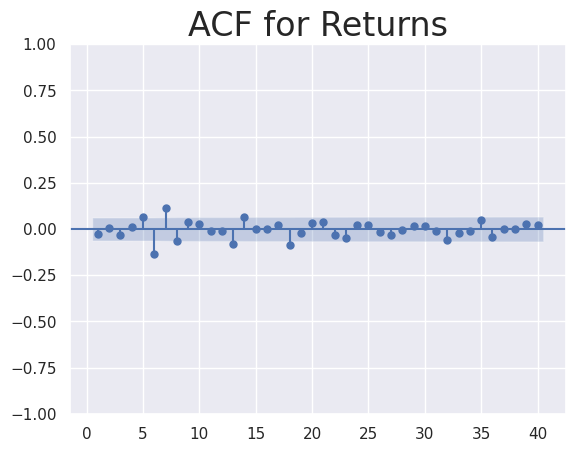

In [28]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

**MODELO MA(1) PARA LOS RETORNOS**

 Aquí, se está creando un modelo ARMA usando todos los elementos de la columna returns del DataFrame df a partir del segundo elemento para evitar un valor no definido. Además, indicamos el orden del modelo ARMA. El primer número representa el orden AR y el segundo número representa el orden MA. En este caso, order=(0,1) significa que el modelo es puramente de Media Móvil de primer orden (MA(1)), sin componente autoregresivo. También, debo ajustar el modelo a los datos proporcionados t almacenarlas en results_ret_ma_1. Finalmente, le indico que quiero un resumen de los resultados, donde me detallan los coeficientes estimados, el error estándar, los valores p, etc.

In [29]:
model_ret_ma_1 = ARIMA(df.returns[1:], order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1588.978
Date:                Sat, 14 Oct 2023   AIC                           3183.956
Time:                        00:59:07   BIC                           3198.664
Sample:                    12-04-2018   HQIC                          3189.548
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.038      0.172      0.863      -0.069       0.082
ma.L1         -0.0280      0.017     -1.602      0.109      -0.062       0.006
sigma2         1.4277      0.024     59.360      0.000       1.381       1.475
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7158.57
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.90
Prob(H) (two-sided):                  0.97   Kurtosis:                        16.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**MODELO MA CON MAYORES REZAGOS PARA LOS RENDIMIENTOS**

En los siguientes comandos crearé modelos ARMA con diferentes términos de media móvil, MA desde el 2 al 8 pero sin términos autoregresivos (AR). Luego ajuste el modelo con .fit() para encontrar los coeficientes que minimizan la suma de los errores cuadrados entre las predicciones del modelo y los valores reales de la serie de tiempo. Después le pedimos que nos dé un resumen de los resultados del ajuste del modelo. Finalmente, realizamos la prueba LLR para comparar dos modelos ARMA. Esta prueba se utiliza para determinar si el modelo ha presentado una mejora significativa con respecto al anterior.

In [30]:
model_ret_ma_2 = ARIMA(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1588.974
Date:                Sat, 14 Oct 2023   AIC                           3185.948
Time:                        00:59:17   BIC                           3205.559
Sample:                    12-04-2018   HQIC                          3193.403
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.039      0.171      0.864      -0.069       0.082
ma.L1         -0.0279      0.018     -1.587      0.112      -0.062       0.007
ma.L2          0.0029      0.019      0.149      0.8

In [31]:
model_ret_ma_3 = ARIMA(df.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1588.268
Date:                Sat, 14 Oct 2023   AIC                           3186.536
Time:                        00:59:21   BIC                           3211.050
Sample:                    12-04-2018   HQIC                          3195.855
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.038      0.185      0.853      -0.067       0.081
ma.L1         -0.0259      0.018     -1.474      0.141      -0.060       0.009
ma.L2          0.0080      0.019      0.415      0.6

In [32]:
model_ret_ma_4 = ARIMA(df.returns[1:], order=[0,0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -1587.772
Date:                Sat, 14 Oct 2023   AIC                           3187.543
Time:                        00:59:31   BIC                           3216.960
Sample:                    12-04-2018   HQIC                          3198.726
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.039      0.172      0.863      -0.070       0.084
ma.L1         -0.0303      0.018     -1.707      0.088      -0.065       0.004
ma.L2          0.0178      0.020      0.900      0.3

In [33]:
model_ret_ma_5 = ARIMA(df.returns[1:], order=[0,0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -1586.568
Date:                Sat, 14 Oct 2023   AIC                           3187.136
Time:                        00:59:35   BIC                           3221.456
Sample:                    12-04-2018   HQIC                          3200.183
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.041      0.156      0.876      -0.074       0.087
ma.L1         -0.0146      0.019     -0.786      0.432      -0.051       0.022
ma.L2         -0.0011      0.022     -0.050      0.9

In [34]:
model_ret_ma_6 = ARIMA(df.returns[1:], order=[0,0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -1577.150
Date:                Sat, 14 Oct 2023   AIC                           3170.299
Time:                        00:59:39   BIC                           3209.521
Sample:                    12-04-2018   HQIC                          3185.210
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0072      0.037      0.193      0.847      -0.066       0.081
ma.L1          0.0099      0.021      0.469      0.639      -0.031       0.051
ma.L2         -0.0166      0.021     -0.776      0.4

In [35]:
model_ret_ma_7 = ARIMA(df.returns[1:], order=[0,0,7])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -1572.644
Date:                Sat, 14 Oct 2023   AIC                           3163.289
Time:                        00:59:43   BIC                           3207.413
Sample:                    12-04-2018   HQIC                          3180.063
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.040      0.163      0.870      -0.072       0.085
ma.L1          0.0012      0.022      0.052      0.958      -0.042       0.045
ma.L2         -0.0160      0.021     -0.757      0.4

In [36]:
model_ret_ma_8 = ARIMA(df.returns[1:], order=[0,0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                  995
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -1571.844
Date:                Sat, 14 Oct 2023   AIC                           3163.687
Time:                        00:59:50   BIC                           3212.715
Sample:                    12-04-2018   HQIC                          3182.326
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0068      0.040      0.171      0.864      -0.071       0.085
ma.L1          0.0006      0.023      0.027      0.979      -0.044       0.045
ma.L2         -0.0103      0.021     -0.482      0.6

In [37]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)

0.005

**RETORNOS DE LOS RESIDUOS**

Lo primero es añador una nueva columna al dataframe llamada res_ret_ma_8, la cual almacenará los residuos del modelo. El [1:] al final sugiere que el primer valor de los residuos está siendo excluido. Luego aplica un código para que me arroje tanto la media como la varianza de la columna res_ret_ma_8 pero redondeado a 3 decimales. Luego, se calcula la desviación estándar de la columna misma columan redondeada a 3 decimales. Posterior a ello, mostramos un gráfico de la serie temporal de la columna res_ret_ma_8 (excluyendo el primer valor) y le indicamos un tamaño específico y un título personalizado. Para demostrar si res_ret_ma_8 es estacionario o no, realizo la prueba de Dickey-Fuller aumentada pero excluyendo los dos primeros valores. Finalmente,  se crea un gráfico de la función de autocorrelación (ACF) de res_ret_ma_8, excluyendo los dos primeros valores y el lag 0, y considerando hasta 40 retrasos.

In [38]:
df["res_ret_ma_8"] = results_ret_ma_8.resid[1:]

In [39]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))


The mean of the residuals is 0.0
The variance of the residuals is 1.382


In [40]:
round(sqrt(df.res_ret_ma_8.var()),3)

1.176

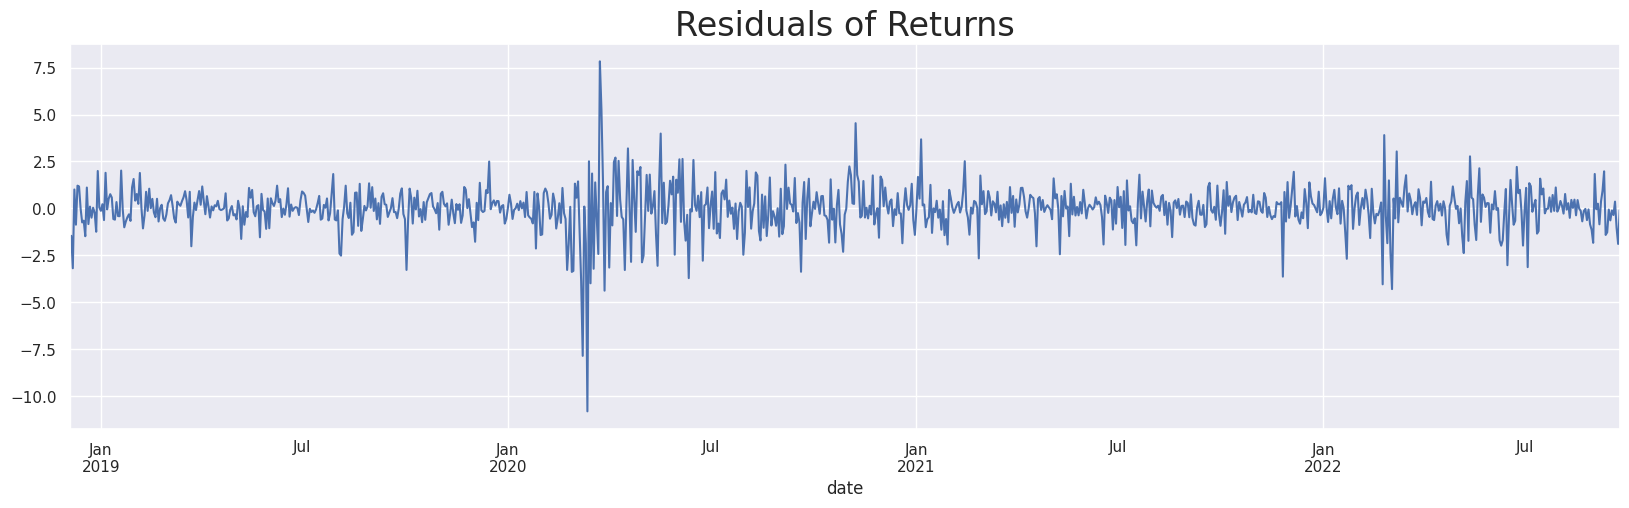

In [41]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [42]:
sts.adfuller(df.res_ret_ma_8[2:])

(-31.568549961515366,
 0.0,
 0,
 993,
 {'1%': -3.4369525024039884,
  '5%': -2.8644550095200705,
  '10%': -2.568322093455802},
 3072.6966158142923)

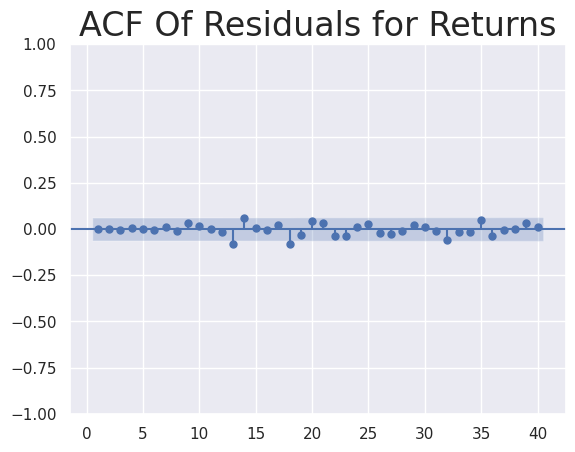

In [43]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

**RETORNOS NORMALIZADOS**

Primero se está tomando el segundo valor (índice 1) de la columna 'returns' del DataFrame df y se almacena en bench_ret. Luego, se normalizan todos los retornos en la columna 'returns' dividiéndolos por bench_ret y multiplicándolos por 100, el resultado se almacena en una nueva columna 'norm_ret'. Después,  se está utilizando la función plot_acf para graficar la autocorrelación de los retornos normalizados, considerando hasta 40 rezagos. Luego, se especifica y ajusta un modelo ARMA con 0 términos autoregresivos y 8 términos de media móvil a los retornos normalizados. También se muestra un resumen de los resultados del modelo. Ya para culminar se están extrayendo los residuos (errores) del modelo ARMA ajustado y se almacenan en una nueva columna para graficarlos. Finalmente, se utiliza nuevamente la función plot_acf para visualizar la autocorrelación de los residuos del modelo.

In [44]:
bench_ret = df.returns.iloc[1]
df["norm_ret"] = df.returns.div(bench_ret).mul(100)

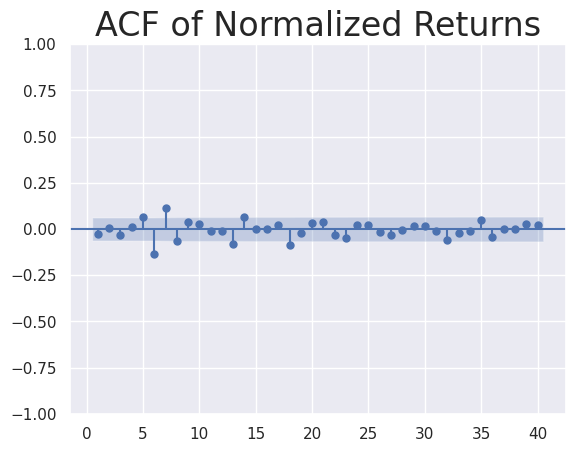

In [45]:
sgt.plot_acf(df.norm_ret[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA


In [46]:
model_norm_ret_ma_8 = ARIMA(df.norm_ret[1:], order=(0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                  995
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -6729.651
Date:                Sat, 14 Oct 2023   AIC                          13479.303
Time:                        01:02:32   BIC                          13528.330
Sample:                    12-04-2018   HQIC                         13497.941
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1790      7.145     -0.165      0.869     -15.183      12.826
ma.L1          0.0006      0.023      0.026      0.979      -0.044       0.046
ma.L2         -0.0103      0.022     -0.477      0.633      -0.053       0.032
ma.L3         -0.0290      0.018     -1.633      0.102      -0.064       0.006
ma.L4          0.0114      0.022      0.517      0.605      -0.032       0.054
ma.L5          0.0634      0.024      2.665      0.008       0.017       0.110
ma.L6         -0.1225      0.022     -5.460      0.000      -0.166      -0.079
ma.L7          0.0920      0.023      3.995      0.000       0.047       0.137
ma.L8         -0.0418      0.018     -2.273      0.023      -0.078      -0.006
sigma2      4.423e+04   1107.605     39.936      0.000    4.21e+04    4.64e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6310.30
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.98
Prob(H) (two-sided):                  0.70   Kurtosis:                        15.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
df["res_norm_ret_ma_8"] = results_ret_ma_8.resid[1:]

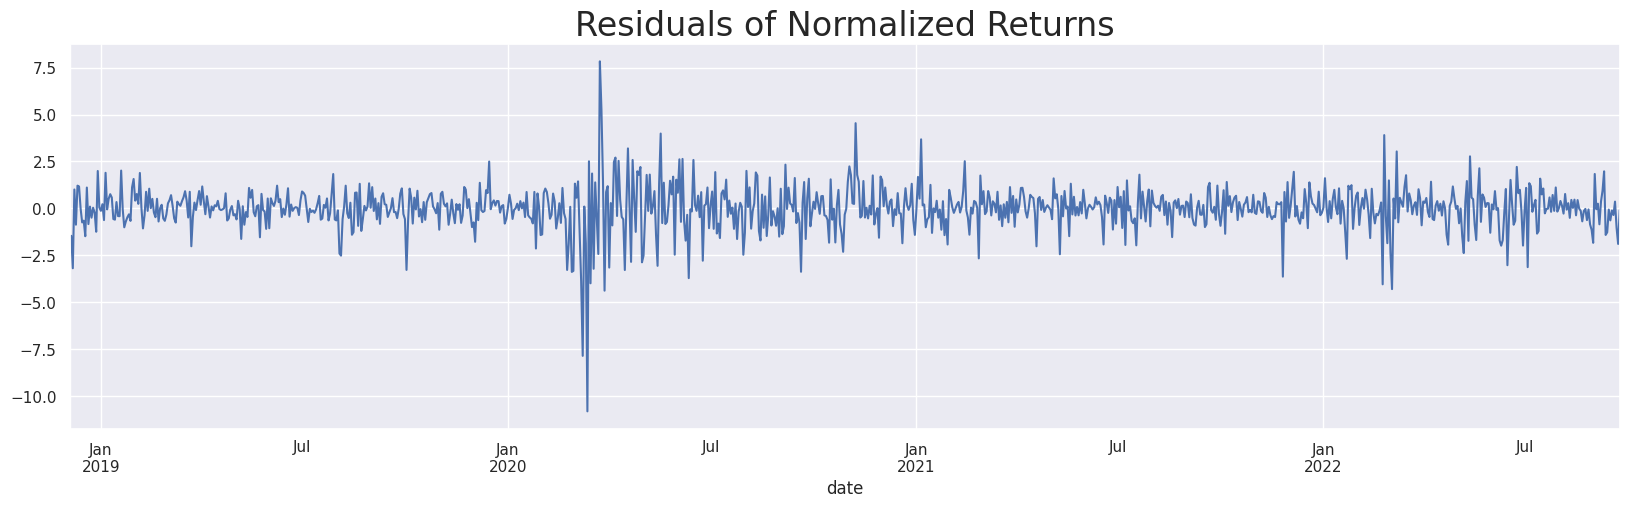

In [48]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

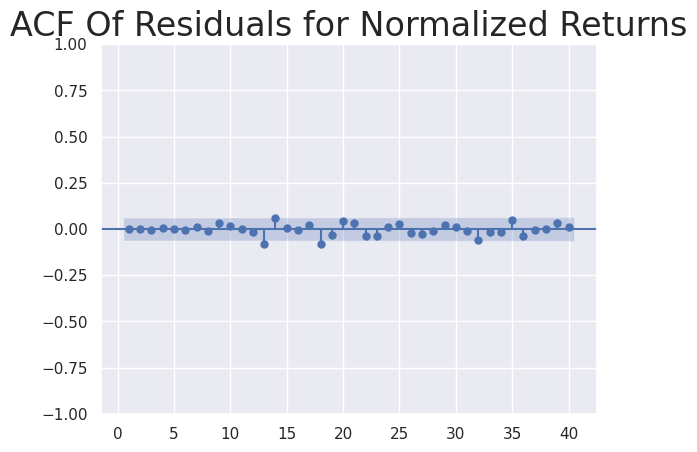

In [49]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

**MODELOS MA PARA PRECIOS**

 La función plot_acf nos sirve para visualizar la función de autocorrelación (ACF) de market_value. En el gráfico ACF se visualiza cómo los valores de market_value están correlacionados con sus valores pasados, hasta 40 períodos anteriores. Además, se indican algunas especificaciones al gráfico como el titulo y tamaño. Finalmente, se ajusta un modelo de media móvil de primer orden (MA(1)) a la serie temporal df.market_value y luego muestra un resumen estadístico.

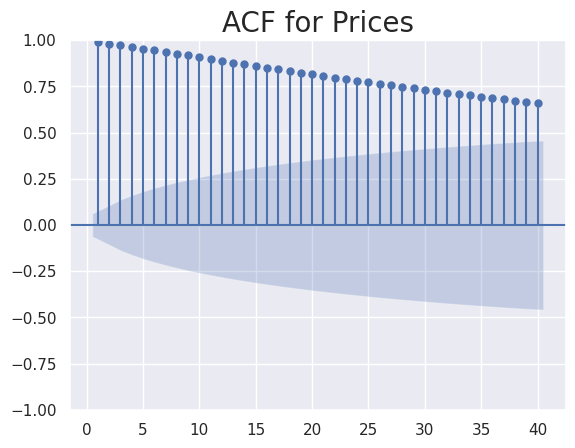

In [50]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [52]:
model_ma_1 = ARIMA(df.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                  996
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7106.513
Date:                Sat, 14 Oct 2023   AIC                          14219.026
Time:                        01:03:20   BIC                          14233.737
Sample:                    12-03-2018   HQIC                         14224.619
                         - 09-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6955.0908     24.252    286.782      0.000    6907.557    7002.624
ma.L1          0.9322      0.014     68.718      0.000       0.906       0.959
sigma2      9.206e+04   4868.729     18.908      0.000    8.25e+04    1.02e+05
===================================================================================
Ljung-Box (L1) (Q):                 675.82   Jarque-Bera (JB):               165.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.98
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""